In [46]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "Bengaluru_House_Data.csv"  # Update with your file path if needed
df = pd.read_csv(file_path)

# Exclude the target feature 'price' and calculate missing values percentage
missing_data_perc = df.drop(columns=['price']).isnull().mean() * 100

# Print missing data percentage
print("Missing Data Percentage:\n", missing_data_perc)

# Remove the feature with the highest missing data
feature_to_remove = missing_data_perc.idxmax()
df.drop(columns=[feature_to_remove], inplace=True)
print(f"\nFeature '{feature_to_remove}' removed due to highest missing data.")

# Handling missing values
# Fill missing values in categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Fill missing values in numerical columns with median
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Outlier Removal
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to numerical columns (except 'price')
for col in numerical_cols:
    # if col != 'price':  # Keep target variable unchanged
    df = remove_outliers(df, col)



Missing Data Percentage:
 area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
dtype: float64

Feature 'society' removed due to highest missing data.


In [47]:
# handle numerical entries that are ranges
def convert_sqft(value):
    try:
        if '-' in value:
            low, high = value.split('-')
            return (float(low) + float(high)) / 2  # Take the average
        return float(value)  # If it's a single number, keep it
    except:
        return np.nan

df['total_sqft'] = df['total_sqft'].astype(str).apply(convert_sqft)
print("\nConverted 'total_sqft' column to numerical values.")

summary_stats = df.describe().T[['mean', 'std', 'min', 'max']]
print("Summary Statistics:\n", summary_stats)


Converted 'total_sqft' column to numerical values.
Summary Statistics:
                    mean         std  min      max
total_sqft  1324.134115  807.054524  1.0  52272.0
bath           2.307857    0.683196  1.0      4.0
balcony        1.559975    0.777683  0.0      3.0
price         73.174030   36.369353  8.0    190.0


In [48]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

categorical_features = ['area_type', 'location', 'size', 'availability']

label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store the encoder for later use

# Save the cleaned dataset
df.to_csv("Cleaned_Bengaluru_House_Data.csv", index=False)
print("\nData cleaning completed. Cleaned dataset saved as 'Cleaned_Bengaluru_House_Data.csv'.")



Data cleaning completed. Cleaned dataset saved as 'Cleaned_Bengaluru_House_Data.csv'.


/home/akshara/.local/lib/python3.10/site-packages/pandas/core/indexes/base.py:7833: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


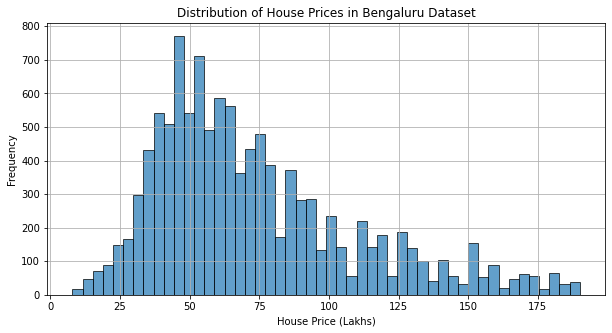

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load cleaned dataset
file_path = "Cleaned_Bengaluru_House_Data.csv"
df = pd.read_csv(file_path)

# Visualize price distribution
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("House Price (Lakhs)")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices in Bengaluru Dataset")
plt.grid(True)
plt.show()




/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/tmp/ipykernel_1644084/938982259.py:52: RuntimeWarning: overflow encountered in exp
  re


Ordered results (by RMSE):
{'hidden_layers': 2, 'hidden_layer_size': 32, 'activation': 'tanh', 'learning_rate': 0.01, 'epochs': 50, 'gd_type': 'mini', 'batch_size': 32, 'mse': 501.6660503072424, 'rmse': 22.39790281046961, 'r2': 0.6207539991156675, 'history': {'train_loss': [2104.505697402846, 763.5653198298447, 642.487043830297, 582.4110838049046, 548.5365016136575, 533.2381480486565, 522.6988089946138, 516.7920340809101, 515.2197745043321, 508.28735472082906, 508.4573550950822, 502.10958267151426, 499.85622956873334, 497.6690693717105, 496.1823144726959, 493.22962735089595, 492.8892074710114, 490.83372852466573, 489.79235788291703, 486.6738289467855, 486.51163880772503, 486.58380710498477, 484.27675721992233, 482.3679174091899, 480.6007011911133, 480.9229151980715, 480.0141915400987, 477.6832948922368, 476.23669677687263, 476.41028825888145, 476.0888199480106, 474.8190004079319, 472.95737697827974, 469.78401299256836, 471.5454403869572, 468.4752726769098, 467.71817745025703, 466.8249

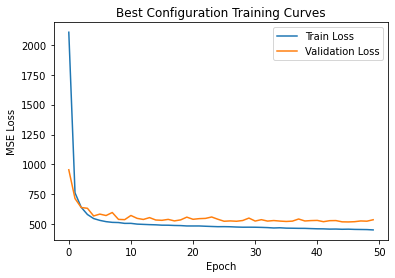

In [ ]:
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --------------------
# Data Loading & Preprocessing
# --------------------
file_path = "Cleaned_Bengaluru_House_Data.csv"
df = pd.read_csv(file_path)

# Drop any rows with missing values
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=['price']).values   # all columns except price
y = df['price'].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data (70% train, 15% validation, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test     = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Transpose so each column is a sample (required by our MLP)
X_train = X_train.T
X_val   = X_val.T
X_test  = X_test.T
y_train = y_train.T  # shape: (1, n_samples)
y_val   = y_val.T
y_test  = y_test.T


def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def identity(x):
    return x
def identity_derivative(x):
    return np.ones_like(x)


def mse_loss(pred, y):
    return np.mean((pred - y)**2)
def mse_loss_derivative(pred, y):
    return 2 * (pred - y) / pred.shape[1]


class Layer:
    def __init__(self, input_size, output_size, activation='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.activation_name = activation
        
        # Weight initialization: He initialization for relu, or similar for others.
        if activation == 'relu':
            self.weights = np.random.randn(output_size, input_size) * np.sqrt(2 / input_size)
        else:
            self.weights = np.random.randn(output_size, input_size) * np.sqrt(2 / (input_size + output_size))
        self.biases = np.zeros((output_size, 1))
        
        # For caching forward-pass values and gradients
        self.inputs = None
        self.weighted_input = None
        self.outputs = None
        self.weights_gradient = np.zeros_like(self.weights)
        self.biases_gradient = np.zeros_like(self.biases)
        self.delta = None

    def activate(self, x):
        if self.activation_name == 'relu':
            return relu(x)
        elif self.activation_name == 'tanh':
            return tanh(x)
        elif self.activation_name == 'sigmoid':
            return sigmoid(x)
        elif self.activation_name == 'linear':
            return x
        else:
            raise ValueError("Unknown activation function")

    def activate_derivative(self, x):
        if self.activation_name == 'relu':
            return relu_derivative(x)
        elif self.activation_name == 'tanh':
            return tanh_derivative(x)
        elif self.activation_name == 'sigmoid':
            return sigmoid_derivative(x)
        elif self.activation_name == 'linear':
            return np.ones_like(x)
        else:
            raise ValueError("Unknown activation function")

    def forward(self, inputs):
        self.inputs = inputs
        self.weighted_input = self.weights @ inputs + self.biases
        self.outputs = self.activate(self.weighted_input)
        return self.outputs

    def compute_gradients(self, delta_next=None, weights_next=None, y_true=None):
        if y_true is not None:
            # Output layer: use derivative of MSE loss.
            self.delta = mse_loss_derivative(self.outputs, y_true)
        else:
            self.delta = (weights_next.T @ delta_next) * self.activate_derivative(self.weighted_input)
        self.weights_gradient = self.delta @ self.inputs.T
        self.biases_gradient = np.sum(self.delta, axis=1, keepdims=True)
        return self.delta

    def update(self, learning_rate, batch_size):
        # Compute gradients per sample and clip to avoid explosion
        grad_w = self.weights_gradient / batch_size
        grad_b = self.biases_gradient / batch_size
        clip_value = 1e3  # adjust as needed
        grad_w = np.clip(grad_w, -clip_value, clip_value)
        grad_b = np.clip(grad_b, -clip_value, clip_value)
        self.weights -= learning_rate * grad_w
        self.biases  -= learning_rate * grad_b


class MLPRegressor:
    def __init__(self, input_size, output_size, hidden_layers, hidden_layer_size, activation='relu'):
        self.layers = []
        if hidden_layers > 0:
            # Create hidden layers
            self.layers.append(Layer(input_size, hidden_layer_size, activation))
            for _ in range(hidden_layers - 1):
                self.layers.append(Layer(hidden_layer_size, hidden_layer_size, activation))
            # Output layer with linear activation for regression
            self.layers.append(Layer(hidden_layer_size, output_size, activation='linear'))
        else:
            # No hidden layers: simple linear model.
            self.layers.append(Layer(input_size, output_size, activation='linear'))
    
    def forward(self, X):
        output = X
        for layer in self.layers:
            output = layer.forward(output)
        return output

    def train_batch(self, X, y, learning_rate):
        output = self.forward(X)
        loss = mse_loss(output, y)
        # Backpropagation: compute gradients from the output layer backward.
        delta = self.layers[-1].compute_gradients(y_true=y)
        for i in range(len(self.layers)-2, -1, -1):
            delta = self.layers[i].compute_gradients(delta_next=delta, weights_next=self.layers[i+1].weights)
        for layer in self.layers:
            layer.update(learning_rate, X.shape[1])
        return loss

    def predict(self, X):
        return self.forward(X)

    def evaluate(self, X, y):
        preds = self.predict(X)
        mse_val = mean_squared_error(y.T, preds.T)
        rmse_val = np.sqrt(mse_val)
        r2_val   = r2_score(y.T, preds.T)
        return mse_val, rmse_val, r2_val

# --------------------
# Training Loop (supports Mini-Batch GD and Batch GD)
# --------------------
def train_network(model, X_train, y_train, X_val, y_val, epochs, learning_rate, batch_size):
    n_samples = X_train.shape[1]
    history = {'train_loss': [], 'val_loss': []}
    for epoch in range(epochs):
        # Shuffle training data at the beginning of each epoch
        indices = np.random.permutation(n_samples)
        X_train_shuffled = X_train[:, indices]
        y_train_shuffled = y_train[:, indices]
        epoch_loss = 0
        # Process batches (if batch_size equals n_samples, this is batch GD)
        for i in range(0, n_samples, batch_size):
            X_batch = X_train_shuffled[:, i:i+batch_size]
            y_batch = y_train_shuffled[:, i:i+batch_size]
            loss = model.train_batch(X_batch, y_batch, learning_rate)
            epoch_loss += loss * X_batch.shape[1]
        epoch_loss /= n_samples
        history['train_loss'].append(epoch_loss)
        # Compute validation loss on the full validation set
        val_output = model.forward(X_val)
        val_loss = mse_loss(val_output, y_val)
        history['val_loss'].append(val_loss)
        # Stop if NaN encountered
        if np.isnan(epoch_loss) or np.isnan(val_loss):
            print("NaN encountered, stopping training.")
            break
    return history

def plot_training_curves(history, title="Training Curves"):
    plt.figure()
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title(title)
    plt.legend()
    plt.show()

# --------------------
# Hyperparameter Grid & Experimentation
# --------------------
hidden_layers_options     = [1, 2]
hidden_layer_size_options = [32, 64]
activation_options        = ['relu', 'tanh', 'sigmoid']
optimizer_options         = ['sgd']  # only SGD is used
learning_rate_options     = [0.01, 0.001]
epochs_options            = [50,25]  # adjust epochs as needed
# For mini-batch GD, we use the given batch_size; for BGD, we use the full training set.
batch_size_mini           = 32
gd_type_options           = ['mini', 'batch','sgd']

def run_experiment(X_train, y_train, X_val, y_val, X_test, y_test,
                   hidden_layers_options, hidden_layer_size_options,
                   activation_options, optimizer_options,
                   learning_rate_options, epochs_options, batch_size_mini,
                   gd_type_options):
    results = []
    best_config = None
    best_rmse = float('inf')
    for hidden_layers in hidden_layers_options:
        for hidden_layer_size in hidden_layer_size_options:
            for activation in activation_options:
                for optimizer in optimizer_options:
                    for learning_rate in learning_rate_options:
                        for epochs in epochs_options:
                            for gd_type in gd_type_options:
                                # Set effective batch size based on GD type
                                if gd_type == 'batch':
                                    effective_batch_size = X_train.shape[1]
                                elif gd_type == 'sgd':
                                    effective_batch_size = 1
                                else:
                                    effective_batch_size = batch_size_mini
                                # Build and train the model
                                model = MLPRegressor(input_size=X_train.shape[0],
                                                     output_size=y_train.shape[0],
                                                     hidden_layers=hidden_layers,
                                                     hidden_layer_size=hidden_layer_size,
                                                     activation=activation)
                                history = train_network(model, X_train, y_train, X_val, y_val,
                                                        epochs, learning_rate, effective_batch_size)
                                mse_val, rmse_val, r2_val = model.evaluate(X_test, y_test)
                                config = {
                                    'hidden_layers': hidden_layers,
                                    'hidden_layer_size': hidden_layer_size,
                                    'activation': activation,
                                    # 'optimizer': optimizer,
                                    'learning_rate': learning_rate,
                                    'epochs': epochs,
                                    'gd_type': gd_type,
                                    'batch_size': effective_batch_size,
                                    'mse': mse_val,
                                    'rmse': rmse_val,
                                    'r2': r2_val,
                                    'history': history
                                }
                                results.append(config)
                                if rmse_val < best_rmse:
                                    best_rmse = rmse_val
                                    best_config = config
    return results, best_config

results, best_config = run_experiment(X_train, y_train, X_val, y_val, X_test, y_test,
                                      hidden_layers_options, hidden_layer_size_options,
                                      activation_options, optimizer_options,
                                      learning_rate_options, epochs_options, batch_size_mini,
                                      gd_type_options)

results_sorted = sorted(results, key=lambda x: x['rmse'])
print("\nOrdered results (by RMSE):")
for config in results_sorted:
    print(config)

print("\nBest configuration:")
print(best_config)

# Report test set metrics for the best configuration
print("\nTest set metrics for best configuration:")
print(f"MSE: {best_config['mse']:.4f}")
print(f"RMSE: {best_config['rmse']:.4f}")
print(f"R^2: {best_config['r2']:.4f}")
print(f"Gradient Descent Type: {best_config['gd_type']}")
print(f"Batch Size used: {best_config['batch_size']}")

plot_training_curves(best_config['history'], title="Best Configuration Training Curves")
